In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
sys.path.append("../../")
import data_loading as dl

from microfit import run_plotter as rp
from microfit import histogram as hist
from microfit import selections as sel
from microfit.run_plotter import RunHistPlotter
from microfit.histogram import Binning, MultiChannelBinning
import make_detsys as detsys

In [3]:
RUN = ["1","2","3","4b","4c","5"]

rundata, mc_weights, data_pot = dl.load_runs(
    RUN,
    data="muon_sideband",
    loadpi0variables=False,
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_lee=False,
    blinded=False,
    enable_cache=True,
    numupresel=True,
    loadnumuvariables=True,
    use_bdt=False,
    load_numu_tki=False,
    load_crt_vars=False
)

Loading run 1
Prior to truth filtering:
268963
After truth filtering:
267465
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 2
Prior to truth filtering:
215945
After truth filtering:
214636
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 3
Prior to truth filtering:
280447
After truth filtering:
278830
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 4b
Prior to truth filtering:
158371
After truth filtering:
157437
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
Loading run 4c
Prior to truth filtering:
99253
After truth filtering:
98653
The sideband data you're using had the following query applied:
n_muons_tot > 0

The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22258 8986 3996
35240
The sideband data you're using had the following query applied:


35066
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22173 8897 3996
35066
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22058 8869 3879
34806
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22058 8869 3879
34806
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22058 8869 3879
34806
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22058 8869 3879
34806
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
22058 8869 3879
34806
The sideband data you're using had the following query app

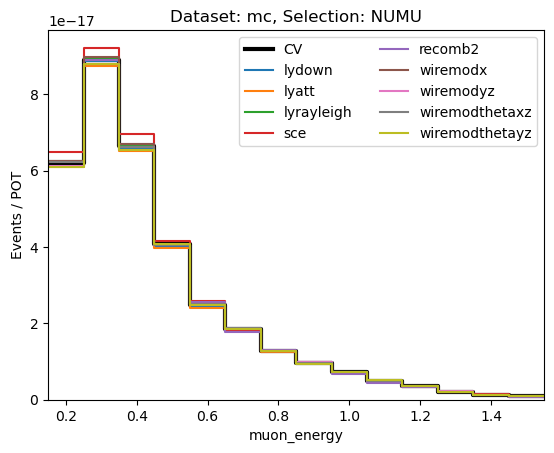

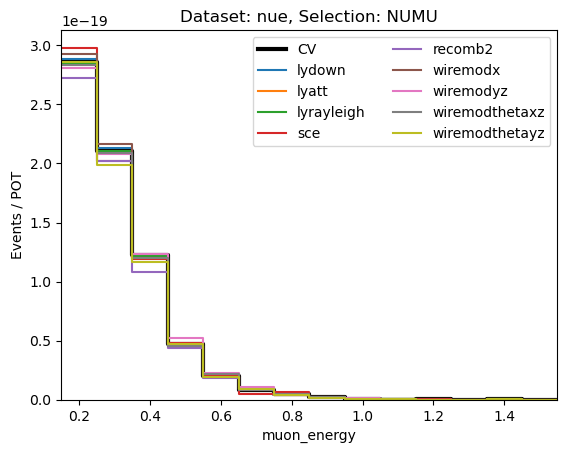

In [4]:
binning_def = ("muon_energy", 14, (0.15, 1.55), "muon candidate reconstructed energy [GeV]")

np_binning = Binning.from_config(*binning_def)
np_binning.label = "NUMU"
selection = "NUMU"
preselection = "NUMU"

np_detvars = detsys.make_variations(
    RUN,
    "muon_sideband",
    selection,
    preselection,
    np_binning,
    make_plots=True,
    truth_filtered_sets=["nue","cc_pi0","nc_pi0"],
    loadpi0variables=False,
    loadshowervariables=False,
    loadrecoveryvars=False,
    loadsystematics=True,
    load_lee=False,
    blinded=False,
    enable_cache=True,
    numupresel=True,
    loadnumuvariables=True,
    use_bdt=False,
    load_numu_tki=False,
    load_crt_vars=False
)

In [5]:
signal_generator_np = hist.RunHistGenerator(
    rundata,
    np_binning,
    data_pot=data_pot,
    selection=selection,
    preselection=preselection,
    uncertainty_defaults=None,
    detvar_data_path=np_detvars,
)

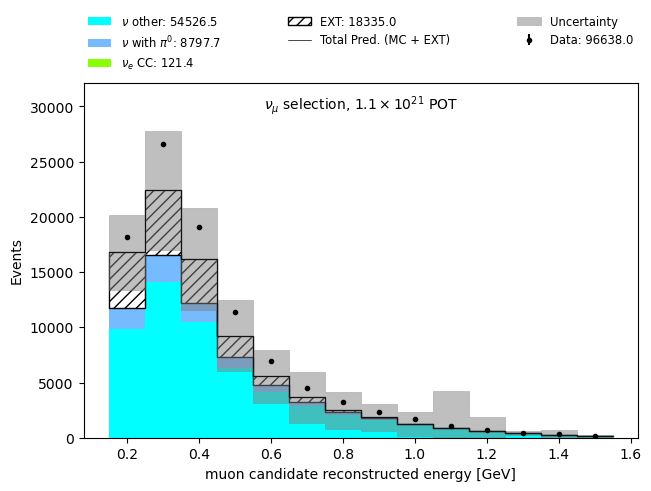

In [6]:
ax = RunHistPlotter(signal_generator_np).plot(
    category_column="paper_category", include_multisim_errors=True, show_data_mc_ratio=False, add_ext_error_floor=False,
    channel="NPBDT",add_precomputed_detsys=True
)